In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
from os import listdir
from os.path import exists

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [2]:
path_csv = './data/Flipkart/flipkart_com-ecommerce_sample_1050.csv'
path_img = './data/Flipkart/Images'
path_img_little = './data/Flipkart/ImagesLittles'

In [3]:
data = pd.read_csv(path_csv)

In [4]:
data.describe(datetime_is_numeric=True, include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
uniq_id,1050,1050,55b85ea15a1536d46b7190ad6fff8ce7,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
crawl_timestamp,1050,149,2015-12-01 12:40:44 +0000,150,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_url,1050,1050,http://www.flipkart.com/elegance-polyester-mul...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_name,1050,1050,Elegance Polyester Multicolor Abstract Eyelet ...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_category_tree,1050,642,"[""Home Furnishing >> Bed Linen >> Blankets, Qu...",56,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pid,1050,1050,CRNEG7BKMFFYHQ8Z,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retail_price,1049.0,NaN,NaN,NaN,2186.197331,7639.229411,35.0,555.0,999.0,1999.0,201000.0
discounted_price,1049.0,NaN,NaN,NaN,1584.527169,7475.09968,35.0,340.0,600.0,1199.0,201000.0
image,1050,1050,55b85ea15a1536d46b7190ad6fff8ce7.jpg,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_FK_Advantage_product,1050,2,False,993,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
@interact
def show_data(key=data.columns):
    return data[key]

0       55b85ea15a1536d46b7190ad6fff8ce7
1       7b72c92c2f6c40268628ec5f14c6d590
2       64d5d4a258243731dc7bbb1eef49ad74
3       d4684dcdc759dd9cdf41504698d737d8
4       6325b6870c54cd47be6ebfbffa620ec7
                      ...               
1045    958f54f4c46b53c8a0a9b8167d9140bc
1046    fd6cbcc22efb6b761bd564c28928483c
1047    5912e037d12774bb73a2048f35a00009
1048    c3edc504d1b4f0ba6224fa53a43a7ad6
1049    f2f027ad6a6df617c9f125173da71e44
Name: uniq_id, Length: 1050, dtype: object

interactive(children=(Dropdown(description='key', options=('uniq_id', 'crawl_timestamp', 'product_url', 'produ…

In [6]:
# Visualisation feature par feature des NaN et catégories
data_summary = pd.DataFrame(
    {},
)


data_tmp = pd.DataFrame(
    {},
)
data_tmp["feature"] = data.columns
data_tmp["qtd_null"] = data.isnull().sum().values
data_tmp["%_null"] = (100 * data.isnull().sum() / data.shape[0]).values
data_tmp["dtype"] = data.dtypes.values
data_tmp["qtd_cat"] = [
    n if t == "object" else 0 for n, t in zip(data.nunique(), data.dtypes)
]

data_summary = pd.concat([data_summary, data_tmp], ignore_index=True)

data_summary.style.background_gradient(cmap="YlGnBu", axis=0)

,feature,qtd_null,%_null,dtype,qtd_cat
0,uniq_id,0,0.000000,object,1050
1,crawl_timestamp,0,0.000000,object,149
2,product_url,0,0.000000,object,1050
3,product_name,0,0.000000,object,1050
4,product_category_tree,0,0.000000,object,642
5,pid,0,0.000000,object,1050
6,retail_price,1,0.095238,float64,0
7,discounted_price,1,0.095238,float64,0
8,image,0,0.000000,object,1050
9,is_FK_Advantage_product,0,0.000000,bool,0


In [7]:
data['product_category_list'] = data['product_category_tree'].apply(lambda e : e[2:-2]).str.split(' >> ')
data['product_category_last'] = data['product_category_list'].apply(lambda e : e[-1])

In [8]:
data['product_category_list']

0       [Home Furnishing, Curtains & Accessories, Curt...
1       [Baby Care, Baby Bath & Skin, Baby Bath Towels...
2       [Baby Care, Baby Bath & Skin, Baby Bath Towels...
3       [Home Furnishing, Bed Linen, Bedsheets, SANTOS...
4       [Home Furnishing, Bed Linen, Bedsheets, Jaipur...
                              ...                        
1045    [Baby Care, Baby & Kids Gifts, Stickers, Oren ...
1046    [Baby Care, Baby & Kids Gifts, Stickers, Wallm...
1047    [Baby Care, Baby & Kids Gifts, Stickers, Uberl...
1048    [Baby Care, Baby & Kids Gifts, Stickers, Wallm...
1049    [Baby Care, Baby & Kids Gifts, Stickers, Uberl...
Name: product_category_list, Length: 1050, dtype: object

In [9]:
data['product_category_last']

0       Elegance Polyester Multicolor Abstract Eyelet ...
1       Sathiyas Cotton Bath Towel (3 Bath Towel, Red,...
2       Eurospa Cotton Terry Face Towel Set (20 PIECE ...
3       SANTOSH ROYAL FASHION Cotton Printed King size...
4       Jaipur Print Cotton Floral King sized Double B...
                              ...                        
1045                                Oren Empower Stickers
1046                                  Wallmantra Stickers
1047                                    Uberlyfe Stickers
1048                                  Wallmantra Stickers
1049                                    Uberlyfe Stickers
Name: product_category_last, Length: 1050, dtype: object

In [10]:
len(data['product_category_list'].explode().unique())

1126

In [11]:
import graphviz

In [12]:
dot = graphviz.Digraph()

lien_deja = set()

# Ajouter la racine de l'arbre
dot.node('Racine')

for n in data['product_category_list'].explode().unique():
    dot.node(n)

def ajouter_lien(precedent, actuel, suite):
    nom = "{}/{}".format(precedent, actuel)
    if nom not in lien_deja:
        dot.edge(precedent, actuel)
        lien_deja.add(nom)
    
    if len(suite) > 0 :
        ajouter_lien(actuel, suite[0], suite[1:])

for l in data['product_category_list']:
    ajouter_lien('Racine', l[0], l[1:])

# Afficher l'arbre
# dot.render('categories', view=True)

In [13]:
data.describe(datetime_is_numeric=True, include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
uniq_id,1050,1050,55b85ea15a1536d46b7190ad6fff8ce7,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
crawl_timestamp,1050,149,2015-12-01 12:40:44 +0000,150,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_url,1050,1050,http://www.flipkart.com/elegance-polyester-mul...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_name,1050,1050,Elegance Polyester Multicolor Abstract Eyelet ...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_category_tree,1050,642,"[""Home Furnishing >> Bed Linen >> Blankets, Qu...",56,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pid,1050,1050,CRNEG7BKMFFYHQ8Z,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retail_price,1049.0,NaN,NaN,NaN,2186.197331,7639.229411,35.0,555.0,999.0,1999.0,201000.0
discounted_price,1049.0,NaN,NaN,NaN,1584.527169,7475.09968,35.0,340.0,600.0,1199.0,201000.0
image,1050,1050,55b85ea15a1536d46b7190ad6fff8ce7.jpg,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_FK_Advantage_product,1050,2,False,993,NaN,NaN,NaN,NaN,NaN,NaN,NaN


[Text(0.5, 0, 'Valeur'), Text(0, 0.5, 'Catégorie')]

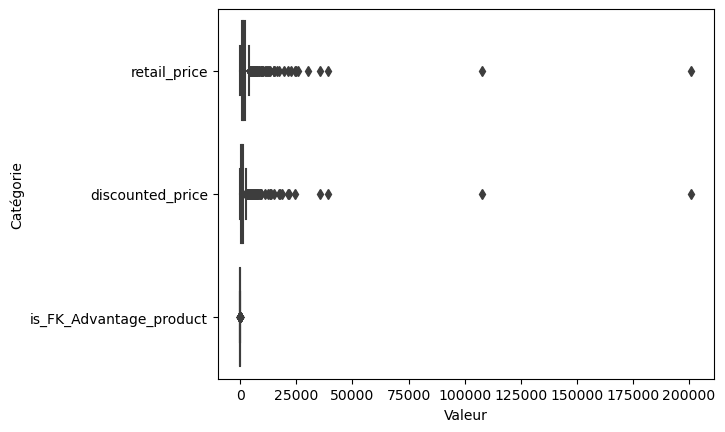

In [14]:
ax = sns.boxplot(data=data, orient="h")
ax.set(xlabel="Valeur", ylabel="Catégorie")

In [15]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

# Charger le modèle de la langue française
nlp = spacy.load("en_core_web_sm")

# Exemple de phrase à traiter
text = "I'm don't 3 black cat sitting on the one mat."

def get_tokens(text):
    # Traiter le texte en utilisant le modèle spaCy
    doc = nlp(text)

    # Liste pour stocker les tokens sans les stopwords
    filtered_tokens = []

    # Boucler sur les tokens
    for token in doc:
        # Ignorer les tokens de ponctuation et les espaces
        if not token.is_punct and not token.is_space and not token.is_digit:
            # Normaliser le token en minuscules
            normalized_token = token.lemma_.lower()
            # Ajouter le token s'il n'est pas un stopword
            if normalized_token not in STOP_WORDS:
                filtered_tokens.append(normalized_token)
    return filtered_tokens

# Afficher les tokens filtrés
print(get_tokens(text))

['black', 'cat', 'sit', 'mat']


In [16]:
n = 2
l = get_tokens(text)
[l[i:i+n] for i in range(0, len(l)-n+1)]

[['black', 'cat'], ['cat', 'sit'], ['sit', 'mat']]

In [17]:
for index, row in data.iterrows():
    print(nlp(row['description']).vector)
    break

[ 0.18682478 -0.11831333  0.21634246 -0.06731637  0.10031971 -0.23848434
  0.19821072 -0.02794836  0.45939368 -0.21317635  0.00168383 -0.19235072
  0.01552514 -0.05785117 -0.32792825 -0.12438595 -0.32835105 -0.21415164
 -0.41880465  0.0443761   0.23864311 -0.10070786 -0.3039092   0.24661727
  0.28212753  0.2482954   0.25944537  0.06918774 -0.13657723 -0.16531289
  0.14873733  0.0389247  -0.39632565 -0.22639358 -0.09811386  0.0856168
 -0.02386914  0.18033566 -0.07405804 -0.26772466 -0.0934329  -0.17858009
 -0.2857376  -0.17209938  0.17795603 -0.0831912   0.5181153  -0.28264236
  0.12539564  0.20116797 -0.02602297 -0.16066591 -0.17008089  0.08819311
  0.08812622 -0.06939647  0.32589436  0.12006411 -0.06473732 -0.19911727
 -0.13196024 -0.0733065   0.03919471  0.24817447 -0.19939336 -0.13520125
  0.17487606  0.03912628 -0.12543179 -0.08347888  0.29667354 -0.0205761
 -0.23800501  0.07622602 -0.26894644  0.4007699  -0.00693984  0.02789807
 -0.26152572  0.15628454 -0.12743527 -0.23759457 -0.0

In [18]:
df = pd.DataFrame(columns=['cat', 'name', 'word'])

for index, row in data.iterrows():
    df.loc[len(df)] = [row['product_category_last'], row['product_name'], get_tokens(row['description'])]

In [19]:
df['text'] = df['word'].str.join(' ')

In [20]:
df

,cat,name,word,text
0,Elegance Polyester Multicolor Abstract Eyelet ...,Elegance Polyester Multicolor Abstract Eyelet ...,"[key, features, elegance, polyester, multicolo...",key features elegance polyester multicolor abs...
1,"Sathiyas Cotton Bath Towel (3 Bath Towel, Red,...",Sathiyas Cotton Bath Towel,"[specification, sathiyas, cotton, bath, towel,...",specification sathiyas cotton bath towel bath ...
2,Eurospa Cotton Terry Face Towel Set (20 PIECE ...,Eurospa Cotton Terry Face Towel Set,"[key, features, eurospa, cotton, terry, face, ...",key features eurospa cotton terry face towel s...
3,SANTOSH ROYAL FASHION Cotton Printed King size...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[key, features, santosh, royal, fashion, cotto...",key features santosh royal fashion cotton prin...
4,Jaipur Print Cotton Floral King sized Double B...,Jaipur Print Cotton Floral King sized Double B...,"[key, features, jaipur, print, cotton, floral,...",key features jaipur print cotton floral king s...
...,...,...,...,...
1045,Oren Empower Stickers,Oren Empower Extra Large Self Adhesive Sticker,"[oren, empower, extra, large, self, adhesive, ...",oren empower extra large self adhesive sticker...
1046,Wallmantra Stickers,Wallmantra Large Vinyl Sticker Sticker,"[wallmantra, large, vinyl, sticker, sticker, p...",wallmantra large vinyl sticker sticker pack pr...
1047,Uberlyfe Stickers,Uberlyfe Extra Large Pigmented Polyvinyl Films...,"[buy, uberlyfe, extra, large, pigmented, polyv...",buy uberlyfe extra large pigmented polyvinyl f...
1048,Wallmantra Stickers,Wallmantra Medium Vinyl Sticker Sticker,"[buy, wallmantra, medium, vinyl, sticker, stic...",buy wallmantra medium vinyl sticker sticker rs...


In [21]:
df_explosed = df.explode('word')

In [22]:
df_explosed

,cat,name,word,text
0,Elegance Polyester Multicolor Abstract Eyelet ...,Elegance Polyester Multicolor Abstract Eyelet ...,key,key features elegance polyester multicolor abs...
0,Elegance Polyester Multicolor Abstract Eyelet ...,Elegance Polyester Multicolor Abstract Eyelet ...,features,key features elegance polyester multicolor abs...
0,Elegance Polyester Multicolor Abstract Eyelet ...,Elegance Polyester Multicolor Abstract Eyelet ...,elegance,key features elegance polyester multicolor abs...
0,Elegance Polyester Multicolor Abstract Eyelet ...,Elegance Polyester Multicolor Abstract Eyelet ...,polyester,key features elegance polyester multicolor abs...
0,Elegance Polyester Multicolor Abstract Eyelet ...,Elegance Polyester Multicolor Abstract Eyelet ...,multicolor,key features elegance polyester multicolor abs...
...,...,...,...,...
1049,Uberlyfe Stickers,Uberlyfe Large Vinyl Sticker,genuine,buy uberlyfe large vinyl sticker rs.595 online...
1049,Uberlyfe Stickers,Uberlyfe Large Vinyl Sticker,products,buy uberlyfe large vinyl sticker rs.595 online...
1049,Uberlyfe Stickers,Uberlyfe Large Vinyl Sticker,day,buy uberlyfe large vinyl sticker rs.595 online...
1049,Uberlyfe Stickers,Uberlyfe Large Vinyl Sticker,replacement,buy uberlyfe large vinyl sticker rs.595 online...


In [23]:
tmp = df_explosed.groupby('cat').agg({'name':['count', 'nunique'], 'word':['count', 'nunique']})
tmp['mots_par_desc'] = tmp[('name', 'count')] / tmp[('name', 'nunique')]
tmp.sort_values(by=('name', 'count'), ascending=False)

name          word  \
                                                   count nunique count   
cat                                                                      
Prithish Coffee Mugs                                1666      26  1666   
Smartpro 19.5v,3.9a Replacement Charger for Vai...  1664       7  1664   
Rockmantra Coffee Mugs                              1569      22  1569   
Blankets, Quilts & Dohars                           1490      56  1490   
Printland Coffee Mugs                                874      13   874   
...                                                  ...     ...   ...   
Marvel Baby Bath Towels                               13       1    13   
BornBabyKids Baby Bath Towels                         13       1    13   
BabyBucket Baby Bath Towels                           13       1    13   
MyKid Nappies & Cloth Diapers                         13       1    13   
Next Steps Dresses                                    11       1    11   

                                                           mots_par_desc  
                                                   nunique                
cat                                                                       
Prithish Coffee Mugs                                   116     64.076923  
Smartpro 19.5v,3.9a Replacement Charger for Vai...     135    237.714286  
Rockmantra Coffee Mugs                                  92     71.318182  
Blankets, Quilts & Dohars                              263     26.607143  
Printland Coffee Mugs                                   55     67.230769  
...                                                    ...           ...  
Marvel Baby Bath Towels                                 13     13.000000  
BornBabyKids Baby Bath Towels                           13     13.000000  
BabyBucket Baby Bath Towels                             13     13.000000  
MyKid Nappies & Cloth Diapers                           12     13.000000  
Next Steps Dresses                                       8     11.000000  

[642 rows x 5 columns]

In [24]:
tmp['mots_uniques_par_desc'] = tmp[('word', 'nunique')] / tmp[('name', 'nunique')]
tmp.sort_values(by=('name', 'count'), ascending=False)

name          word  \
                                                   count nunique count   
cat                                                                      
Prithish Coffee Mugs                                1666      26  1666   
Smartpro 19.5v,3.9a Replacement Charger for Vai...  1664       7  1664   
Rockmantra Coffee Mugs                              1569      22  1569   
Blankets, Quilts & Dohars                           1490      56  1490   
Printland Coffee Mugs                                874      13   874   
...                                                  ...     ...   ...   
Marvel Baby Bath Towels                               13       1    13   
BornBabyKids Baby Bath Towels                         13       1    13   
BabyBucket Baby Bath Towels                           13       1    13   
MyKid Nappies & Cloth Diapers                         13       1    13   
Next Steps Dresses                                    11       1    11   

                                                           mots_par_desc  \
                                                   nunique                 
cat                                                                        
Prithish Coffee Mugs                                   116     64.076923   
Smartpro 19.5v,3.9a Replacement Charger for Vai...     135    237.714286   
Rockmantra Coffee Mugs                                  92     71.318182   
Blankets, Quilts & Dohars                              263     26.607143   
Printland Coffee Mugs                                   55     67.230769   
...                                                    ...           ...   
Marvel Baby Bath Towels                                 13     13.000000   
BornBabyKids Baby Bath Towels                           13     13.000000   
BabyBucket Baby Bath Towels                             13     13.000000   
MyKid Nappies & Cloth Diapers                           12     13.000000   
Next Steps Dresses                                       8     11.000000   

                                                   mots_uniques_par_desc  
                                                                          
cat                                                                       
Prithish Coffee Mugs                                            4.461538  
Smartpro 19.5v,3.9a Replacement Charger for Vai...             19.285714  
Rockmantra Coffee Mugs                                          4.181818  
Blankets, Quilts & Dohars                                       4.696429  
Printland Coffee Mugs                                           4.230769  
...                                                                  ...  
Marvel Baby Bath Towels                                        13.000000  
BornBabyKids Baby Bath Towels                                  13.000000  
BabyBucket Baby Bath Towels                                    13.000000  
MyKid Nappies & Cloth Diapers                                  12.000000  
Next Steps Dresses                                              8.000000  

[642 rows x 6 columns]

In [25]:
df_explosed.drop_duplicates().groupby('cat').count().sort_values(by='word', ascending=False)

,name,word,text
cat,,,
"Blankets, Quilts & Dohars",1056,1056,1056
Prithish Coffee Mugs,880,880,880
"Smartpro 19.5v,3.9a Replacement Charger for Vaio...",846,846,846
Rockmantra Coffee Mugs,828,828,828
Maxima Wrist Watches,713,713,713
...,...,...,...
Utsav Handicraft Religious Idols,11,11,11
Celebrity Pizza Cutters,11,11,11
Sam Pizza Cutters,11,11,11


In [26]:
df_explosed.groupby('word').count().sort_values(by='cat', ascending=False)

,cat,name,text
word,,,
free,618,618,618
buy,583,583,583
products,577,577,577
delivery,567,567,567
cash,564,564,564
...,...,...,...
rare,1,1,1
rani,1,1,1
disks,1,1,1


In [27]:
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
sentences = df['text'].to_list()
len(sentences)

1050

In [29]:
vectorizer = CountVectorizer()

bow = vectorizer.fit_transform(sentences)

In [30]:
print(bow.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
